# Background
An airline company is recruiting data scientists. This company has conducted survey to find out the customer satisfaction towards their services. According to the survey, there are some customers who are satisfied, but there are also customers who are not satisfied with the services provided by the airline company.

# Research Question
The airline company wants to know **what are the factors that affect customer satisfaction level**. This information will help the company to improve, revise, or even rehaul their services if needed.

As a data analyst, I am going to try to answer the following question:

**Which factors affect customer satisfaction level? Is there any service that need to be further investigated?**

# Data
To answer above-mentioned question, I will analyze the customer satisfaction data that has been collected by the company. You can access the dataset [here](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). 

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy.stats import skewtest, skew
from scipy.stats import kstest

This dataset contains an airline passenger satisfaction survey. There are 24 columns inside dataset 'airline passanger satisfaction', which are:

1. __Id__: Unique ID for each passenger<br>
2. __Gender__: Gender of the passenger (Female, Male)<br>
3. __Customer Type__: Types of customer (loyal customer, disloyal customer)<br>
4. __Age__: The actual age of the passenger<br>
5. __Type of Travel__: Purpose of the flight of the passengers (Personal Travel, Business Travel)<br>
6. __Class__: Travel class in the plane of the passengers (Business, Eco, Eco Plus)<br>
7. __Flight Distance__: The flight distance of this journey<br>
8. __Inflight Wifi Service__: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)<br>
9. __Departure/Arrival Time Convenient__: Satisfaction level of departure/arrival time convenient<br>
10. __Ease of Online booking__: Satisfaction level of online booking<br>
11. __Gate Location__: Satisfaction level of gate location<br>
12. __Food and Drink__: Satisfaction level of food and drink<br>
13. __Online Boarding__: Satisfaction level of online boarding<br>
14. __Seat Comfort__: Satisfaction level of seat comfort<br>
15. __Inflight Entertainment__: Satisfaction level of inflight entertainment<br>
16. __On-board Service__: Satisfaction level of On-board service<br>
17. __Leg Room Service__: Satisfaction level of Leg room service<br>
18. __Baggage Handling__: Satisfaction level of baggage handling<br>
19. __Checkin Service__: Satisfaction level of Check-in service<br>
20. __Inflight Service__: Satisfaction level of inflight service<br>
21. __Cleanliness__: Satisfaction level of Cleanliness<br>
22. __Departure Delay in Minutes__: Minutes delayed upon departure<br>
23. __Arrival Delay in Minutes__: Minutes delayed upon Arrival<br>
24. __Satisfaction__: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)<br>


Below are 5 top and bottom rows from dataset 'airline passanger satisfaction'.

In [427]:
df = pd.read_csv('airline passanger satisfaction.csv')
df.drop(labels='Unnamed: 0', axis=1, inplace=True) # I dropped the 'Unnamed: 0' column because it is not necessary. The original file did not put index=False parameter.
display(df.head(), df.tail())

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.00,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.00,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.00,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.00,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.00,neutral or dissatisfied


In [428]:
pd.set_option("display.max_columns", 30) # I set the maximum column display to 30 columns to see all columns inside the dataframe.

## Data Understanding and Cleaning
Before getting into the analysis part, we need to know our dataset further in the data understanding stage. In this process, we will know what anomalies are in our dataset and need to be handled in the data cleaning stage. Each anomaly handling will be provided with a justification for the steps taken, both in domain knowledge and statistically.

In [429]:
display(df.describe(), df.describe(include='object')) # I use .describe(include='object') to get descriptive statistical information on both categorical and numerical column in the dataframe. 

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,64924.21,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,37463.81,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,32533.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,64856.50,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,97368.25,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [430]:
print(f'The number of rows and columns in the dataset is: {df.shape}') # By using df.shape, we can determine the number of rows and columns by the dataframe shape.
df.info() # I use .info() to see the data type of each column and if there are any null value.

The number of rows and columns in the dataset is: (103904, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904

In [431]:
# Creating a dataframe/table to see all column names, number of unique value, and some unique value samples

pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


Generally, we can see from those information above that:
- Dataset 'airline passanger satisfaction' has 24 columns and 103904 rows.
- There is 1 column that has missing values, indicated by 'nan' value, which is the 'Arrival Delay in Minutes'.
- The 'Id' column contains unique ID for each passenger, which is irrelevant and will not be useful in data analysis. I will erase it later on.
- The data type of column 'Arrival Delay in Minutes' is float, which we should change to integer.
- There are some inconsistency of writing in the dataframe. For example, in 'Type of Travel' column, there are 2 forms of writing: Personal Travel and business travel (notice that the 't' in Business travel is in lower case, while in the Personal Travel, it is in upper case). Same goes for 'Customer Type' column.

### Missing Value

In [432]:
df.isna().sum() # Use .isna().sum() to count how many missing values in each column.

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [433]:
df['Arrival Delay in Minutes'].isna().sum()/df.shape[0]*100 # This function is to check the percentage of missing values in 'Arrival Delay in Minutes' column.

0.29835232522328303

Based on the calculation above, we can see that the proportion of missing values in that particular column is 2.98%

There are 2 possible methods to handle such missing values:
- __First method__: Drop all rows/columns that contain missing value. This method is recommended since our missing value has small proportion (less than 3%).
- __Second method__: Fill the missing value. This method is also recommended. There are several methods that we can use to fill missing values. The best way to fill missing values is to fill them with the their real values, or as close as possible. The second method is to fill them with the mean or median (for quantitative data) and mode (for qualitative data). Dropping the data will be our last resort, do it only if the proportion of missing data is extremely high. Since our missing values are small in size, we will fill it with either mean or median, depending on the distribution (whether parametric or non-parametric).

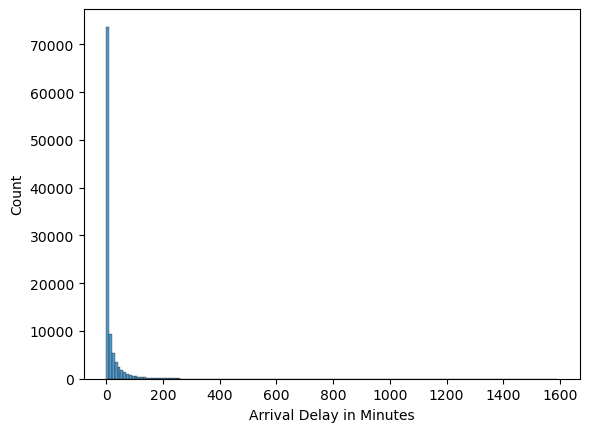

In [434]:
sns.histplot(data=df, x='Arrival Delay in Minutes', binwidth=10); # Using histogram to see the distribution in 'Arrival Delay in Minutes' column

From the graph, we can see that the distribution is not normal (non-parametric). Therefore, we will fill the missing values with median.

First, let us take a look at the median for 'Arrival Delay in Minutes' based on the 'Departure/Arrival time convenient'. Why? We cannot just use the median of the whole data since the value might be affected by some factors (in this case, the Departure/Arrival time convenient). For example, people who rate '5' in 'Departure/Arrival time convenient' will tend to rate higher score in 'Arrival Delay in Minutes' because they had a short delay/no delay at all.

In [435]:
df.groupby('Departure/Arrival time convenient').median()[['Arrival Delay in Minutes']]

,Arrival Delay in Minutes
Departure/Arrival time convenient,
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00


Since the median of all categories has the same value, we can just use fill the missing value with the whole data median (which is 0 minute).

In [436]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median())

Let us check whether the missing values have been filled with the median or no

In [437]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

As you can see, the missing values have been filled.

### Duplicate Values

In [438]:
df[df.duplicated()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


By using .duplicated() function, we can check all duplicated data in the dataframe. In this case, there is no duplicated data. We can go straight to the next step.

### Writing Format Inconsistency

As mentioned above, there are some inconsistency in writing format. We need to change them. Let us start with the easiest one, column labels.

In [439]:
df.columns.to_list()

['id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [440]:
columns = df.columns
myList = []
for name in columns:
    myList.append(name.title())
df.columns = myList
columns = df.columns

By using for loop, we can change the first letter of each word in the column label into uppercase with .title() function.

In [441]:
df.columns.to_list()

['Id',
 'Gender',
 'Customer Type',
 'Age',
 'Type Of Travel',
 'Class',
 'Flight Distance',
 'Inflight Wifi Service',
 'Departure/Arrival Time Convenient',
 'Ease Of Online Booking',
 'Gate Location',
 'Food And Drink',
 'Online Boarding',
 'Seat Comfort',
 'Inflight Entertainment',
 'On-Board Service',
 'Leg Room Service',
 'Baggage Handling',
 'Checkin Service',
 'Inflight Service',
 'Cleanliness',
 'Departure Delay In Minutes',
 'Arrival Delay In Minutes',
 'Satisfaction']

Now, let us make some small adjustments. For example, changing 'On-board Service' into 'Onboard Service' for easier indexing later on.

In [442]:
df = df.rename(columns={'On-Board Service':'Onboard Service'}) # Using .rename(), we can change a specific column label.
df.columns.to_list()

['Id',
 'Gender',
 'Customer Type',
 'Age',
 'Type Of Travel',
 'Class',
 'Flight Distance',
 'Inflight Wifi Service',
 'Departure/Arrival Time Convenient',
 'Ease Of Online Booking',
 'Gate Location',
 'Food And Drink',
 'Online Boarding',
 'Seat Comfort',
 'Inflight Entertainment',
 'Onboard Service',
 'Leg Room Service',
 'Baggage Handling',
 'Checkin Service',
 'Inflight Service',
 'Cleanliness',
 'Departure Delay In Minutes',
 'Arrival Delay In Minutes',
 'Satisfaction']

Let us move to 'Type of Travel' and 'Customer Type'. As mentioned before, there are also some inconsistency of writing here. Let's change 'Business travel' to 'Business Travel' and 'disloyal Customer' to 'Disloyal Customer'.

In [443]:
df['Type Of Travel'] = df['Type Of Travel'].str.title()
df['Customer Type'] = df['Customer Type'].str.title()
df['Satisfaction'] = df['Satisfaction'].str.title()
df

,Id,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,Neutral Or Dissatisfied
1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,Neutral Or Dissatisfied
2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,Satisfied
3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,Neutral Or Dissatisfied
4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,Disloyal Customer,23,Business Travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.00,Neutral Or Dissatisfied
103900,73097,Male,Loyal Customer,49,Business Travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.00,Satisfied
103901,68825,Male,Disloyal Customer,30,Business Travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.00,Neutral Or Dissatisfied
103902,54173,Female,Disloyal Customer,22,Business Travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.00,Neutral Or Dissatisfied


Next, let us change the data type of 'Arrival Delay In Minutes' from float to int.

In [444]:
df['Arrival Delay In Minutes'] = df['Arrival Delay In Minutes'].astype(int)
df['Arrival Delay In Minutes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 103904 entries, 0 to 103903
Series name: Arrival Delay In Minutes
Non-Null Count   Dtype
--------------   -----
103904 non-null  int32
dtypes: int32(1)
memory usage: 406.0 KB


We are done with this section. Let us move to the next stage: deleting 'Id' column since it is irrelevant to our data analysis.

In [445]:
df.drop('Id', axis=1, inplace=True)
df

,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,Neutral Or Dissatisfied
1,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,Neutral Or Dissatisfied
2,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,Satisfied
3,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,Neutral Or Dissatisfied
4,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,Disloyal Customer,23,Business Travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0,Neutral Or Dissatisfied
103900,Male,Loyal Customer,49,Business Travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0,Satisfied
103901,Male,Disloyal Customer,30,Business Travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14,Neutral Or Dissatisfied
103902,Female,Disloyal Customer,22,Business Travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0,Neutral Or Dissatisfied


### Outliers

When a dataset has outliers, it can interfere with the analysis result. Thus, in some cases, it would be better to erase them. Let us check those outliers by using boxplot.

In [446]:
df.boxplot(figsize=(40,5))

From the boxplot above, we can see that there are some outliers in 4 columns: 'Flight Distance', 'Checkin Service', 'Departure Delay In Minutes', and 'Arrival Delay In Minutes'. We __SHOULD NOT__ remove these outliers. Why? Because they are true outliers. In other words, they represent natural variations in the population. Other types of outlier are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling. 

 Now, our data is almost ready to be used for analysis. Let us have a look at current summary.

In [ ]:
listItem = []
for i in df.columns :
    listItem.append([i, df[i].dtype, df[i].isna().sum(),
                    df[i].nunique(), list(df[i].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Missing Data Amount', 'Unique Data Amount', 'Unique Sample'],
                     data=listItem)
print(df.shape)
dfDesc

(103904, 23)


,Data Features,Data Type,Missing Data Amount,Unique Data Amount,Unique Sample
0,Gender,object,0,2,"[Male, Female]"
1,Customer Type,object,0,2,"[Loyal Customer, Disloyal Customer]"
2,Age,int64,0,75,"[8, 37]"
3,Type Of Travel,object,0,2,"[Personal Travel, Business Travel]"
4,Class,object,0,3,"[Eco Plus, Business]"
5,Flight Distance,int64,0,3802,"[1782, 3061]"
6,Inflight Wifi Service,int64,0,6,"[1, 0]"
7,Departure/Arrival Time Convenient,int64,0,6,"[4, 5]"
8,Ease Of Online Booking,int64,0,6,"[2, 0]"
9,Gate Location,int64,0,6,"[0, 2]"


There is a small issue: some rating values are 0 (some probable causes: there are some error during data input, the customers do not answer anything, or the rating system itself starts from 0-5). Since '0' is not considered as missing value (NaN), it did not show up when we use df.isna().sum() function. According to the data source, a rating of '0' is considered as N/A or missing value. In that case, we must fill it with median of that particular column.

In [ ]:
non_rating_col = ['Gender', 'Customer Type', 'Age', 'Type Of Travel', 'Class', 'Flight Distance', 'Departure Delay In Minutes', 'Arrival Delay In Minutes', 'Satisfaction']

In [ ]:
# Let us first see which columns have '0' as rating
for i in df.columns:
    if i not in non_rating_col:
        print(df[i].value_counts().sort_index())

0     3103
1    17840
2    25830
3    25868
4    19794
5    11469
Name: Inflight Wifi Service, dtype: int64
0     5300
1    15498
2    17191
3    17966
4    25546
5    22403
Name: Departure/Arrival Time Convenient, dtype: int64
0     4487
1    17525
2    24021
3    24449
4    19571
5    13851
Name: Ease Of Online Booking, dtype: int64
0        1
1    17562
2    19459
3    28577
4    24426
5    13879
Name: Gate Location, dtype: int64
0      107
1    12837
2    21988
3    22300
4    24359
5    22313
Name: Food And Drink, dtype: int64
0     2428
1    10692
2    17505
3    21804
4    30762
5    20713
Name: Online Boarding, dtype: int64
0        1
1    12075
2    14897
3    18696
4    31765
5    26470
Name: Seat Comfort, dtype: int64
0       14
1    12478
2    17637
3    19139
4    29423
5    25213
Name: Inflight Entertainment, dtype: int64
0        3
1    11872
2    14681
3    22833
4    30867
5    23648
Name: Onboard Service, dtype: int64
0      472
1    10353
2    19525
3    20098
4    2

In [ ]:
# Now, let us replace those zeroes with the median of their respective column.
for i in df.columns:
    if i not in non_rating_col:
     df[i].replace(0,df[i].median(), inplace=True)

In [ ]:
# Let us do a final check to see whether the '0' rating has been replaced or no.
for i in df.columns:
    if i not in non_rating_col:
        print(df[i].value_counts().sort_index())

1    17840
2    25830
3    28971
4    19794
5    11469
Name: Inflight Wifi Service, dtype: int64
1    15498
2    17191
3    23266
4    25546
5    22403
Name: Departure/Arrival Time Convenient, dtype: int64
1    17525
2    24021
3    28936
4    19571
5    13851
Name: Ease Of Online Booking, dtype: int64
1    17562
2    19459
3    28578
4    24426
5    13879
Name: Gate Location, dtype: int64
1    12837
2    21988
3    22407
4    24359
5    22313
Name: Food And Drink, dtype: int64
1    10692
2    17505
3    24232
4    30762
5    20713
Name: Online Boarding, dtype: int64
1    12075
2    14897
3    18696
4    31766
5    26470
Name: Seat Comfort, dtype: int64
1    12478
2    17637
3    19139
4    29437
5    25213
Name: Inflight Entertainment, dtype: int64
1    11872
2    14681
3    22833
4    30870
5    23648
Name: Onboard Service, dtype: int64
1    10353
2    19525
3    20098
4    29261
5    24667
Name: Leg Room Service, dtype: int64
1     7237
2    11521
3    20632
4    37383
5    27131
Na

Let us save this clean data into a new csv, and use it to do data analysis and data visualization.

In [ ]:
df.to_csv('CPM2_CLEAN.csv', index=False)

In [ ]:
df_CPM = pd.read_csv('CPM2_CLEAN.csv')
df_CPM.head()

,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,Neutral Or Dissatisfied
1,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,Neutral Or Dissatisfied
2,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,Satisfied
3,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,Neutral Or Dissatisfied
4,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,Satisfied


# Data Analysis
**The analysis will be done by comparing survey rating data to find out which factors have significant effect on the customer satisfaction level.**

We have done data cleaning step. Now, we can start the data analysis process to figure out **Which factors affect customer satisfaction level? Is there any service that need to be further investigated?**.

In [ ]:
from scipy.stats import mannwhitneyu
# Why we use mann-whitney test? Because our variables are categorical (Satisfaction) and numerical (Rating). That means it is a two-sample unpaired non-parametric inferential statistic test.

Hypothesis:

- H0: Mean of numerical categories for satisfied customer = Mean of numerical categories for unsatisfied customer
- Ha: Mean of numerical categories for satisfied customer ≠ Mean of numerical categories for unsatisfied customer

In [ ]:
# Let us divide the columns into 2 lists: numerical and categorical list for easier data processing

numerical_columns = ['Age', 'Flight Distance', 'Inflight Wifi Service', 'Departure/Arrival Time Convenient', 'Ease Of Online Booking', 'Gate Location', 'Food And Drink', 'Online Boarding', 'Seat Comfort', 'Inflight Entertainment', 'Onboard Service', 'Leg Room Service', 'Baggage Handling', 'Checkin Service', 'Inflight Service', 'Cleanliness', 'Departure Delay In Minutes', 'Arrival Delay In Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Type Of Travel', 'Class', 'Satisfaction']

In [ ]:
# Let us see the separated dataframe

display(df_CPM[categorical_columns], df_CPM[numerical_columns])

,Gender,Customer Type,Type Of Travel,Class,Satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,Neutral Or Dissatisfied
1,Male,Disloyal Customer,Business Travel,Business,Neutral Or Dissatisfied
2,Female,Loyal Customer,Business Travel,Business,Satisfied
3,Female,Loyal Customer,Business Travel,Business,Neutral Or Dissatisfied
4,Male,Loyal Customer,Business Travel,Business,Satisfied
...,...,...,...,...,...
103899,Female,Disloyal Customer,Business Travel,Eco,Neutral Or Dissatisfied
103900,Male,Loyal Customer,Business Travel,Business,Satisfied
103901,Male,Disloyal Customer,Business Travel,Business,Neutral Or Dissatisfied
103902,Female,Disloyal Customer,Business Travel,Eco,Neutral Or Dissatisfied


,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0


In [ ]:
df_CPM_mean_by_satisfaction = df_CPM.groupby('Satisfaction').mean()[numerical_columns]
df_CPM_mean_by_satisfaction = df_CPM_mean_by_satisfaction.reset_index()
df_CPM_mean_by_satisfaction

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes
0,Neutral Or Dissatisfied,37.57,928.92,2.40,3.27,2.62,2.98,2.96,2.71,3.04,2.90,3.02,3.01,3.38,3.04,3.39,2.94,16.50,17.07
1,Satisfied,41.75,1530.14,3.37,3.14,3.23,2.98,3.52,4.12,3.97,3.96,3.86,3.84,3.97,3.65,3.97,3.74,12.61,12.59


In [ ]:
df_CPM_mean_by_satisfaction.to_csv('Mean by Satisfaction.csv')

In [ ]:
df_CPM_mean_by_satisfaction.iloc[0,1:]

Age                                  37.57
Flight Distance                     928.92
Inflight Wifi Service                 2.40
Departure/Arrival Time Convenient     3.27
Ease Of Online Booking                2.62
Gate Location                         2.98
Food And Drink                        2.96
Online Boarding                       2.71
Seat Comfort                          3.04
Inflight Entertainment                2.90
Onboard Service                       3.02
Leg Room Service                      3.01
Baggage Handling                      3.38
Checkin Service                       3.04
Inflight Service                      3.39
Cleanliness                           2.94
Departure Delay In Minutes           16.50
Arrival Delay In Minutes             17.07
Name: 0, dtype: object

In [ ]:
# This code line is useful to display 10 digits after the decimal point

pd.options.display.float_format = "{:.10f}".format

In [ ]:
list_pvalue = []

stat, pvalue = mannwhitneyu(
    df_CPM[df_CPM['Satisfaction']=='Satisfied'][numerical_columns],
    df_CPM[df_CPM['Satisfaction']=='Neutral Or Dissatisfied'][numerical_columns],
    alternative='two-sided'
)

list_pvalue.append(pvalue)
df_pvalue = pd.DataFrame({
    'Category':numerical_columns,
    'p-value':pvalue
})
df_pvalue

,Category,p-value
0,Age,0.0000000000
1,Flight Distance,0.0000000000
2,Inflight Wifi Service,0.0000000000
3,Departure/Arrival Time Convenient,0.0000000000
4,Ease Of Online Booking,0.0000000000
5,Gate Location,0.9695541106
6,Food And Drink,0.0000000000
7,Online Boarding,0.0000000000
8,Seat Comfort,0.0000000000
9,Inflight Entertainment,0.0000000000


In [ ]:
# conclusion
for i in df_pvalue.index:
    if df_pvalue.iloc[i,1] > 0.05:
        print(f'''{i+1}. The pvalue of "{df_pvalue.iloc[i,0]}" = {df_pvalue.iloc[i,1]}. pvalue > 0.05. Failed to reject Ho. 
        We DO NOT have enough proof that the Mean of "{df_pvalue.iloc[i,0]}" for satisfied customer is significantly different than the Mean of "{df_pvalue.iloc[i,0]}" for unsatisfied customer
        ''')
    else:
        print(f'''{i+1}. The pvalue of "{df_pvalue.iloc[i,0]}" = {df_pvalue.iloc[i,1]}. pvalue <= 0.05. Reject Ho. 
        We DO have enough proof that the Mean of "{df_pvalue.iloc[i,0]}" for satisfied customer is significantly different than the Mean of "{df_pvalue.iloc[i,0]}" for unsatisfied customer
        ''')

1. The pvalue of "Age" = 0.0. pvalue <= 0.05. Reject Ho. 
        We DO have enough proof that the Mean of "Age" for satisfied customer is significantly different than the Mean of "Age" for unsatisfied customer
        
2. The pvalue of "Flight Distance" = 0.0. pvalue <= 0.05. Reject Ho. 
        We DO have enough proof that the Mean of "Flight Distance" for satisfied customer is significantly different than the Mean of "Flight Distance" for unsatisfied customer
        
3. The pvalue of "Inflight Wifi Service" = 0.0. pvalue <= 0.05. Reject Ho. 
        We DO have enough proof that the Mean of "Inflight Wifi Service" for satisfied customer is significantly different than the Mean of "Inflight Wifi Service" for unsatisfied customer
        
4. The pvalue of "Departure/Arrival Time Convenient" = 1.3891233588756137e-52. pvalue <= 0.05. Reject Ho. 
        We DO have enough proof that the Mean of "Departure/Arrival Time Convenient" for satisfied customer is significantly different than the

From the conclusion above, we can focus on the categories that have significant difference in their mean (Satisfied vs Unsatisfied):
- Age
- Flight Distance
- Inflight Wifi Service
- Departure/Arrival Time Convenient
- Ease Of Online Booking
- Food And Drink
- Online Boarding
- Seat Comfort
- Inflight Entertainment
- Onboard Service
- Leg Room Service
- Baggage Handling
- Checkin Service
- Inflight Service
- Cleanliness
- Departure Delay In Minutes
- Arrival Delay In Minutes

We can ignore the following category for now, since they do not have significant difference in their mean (Satisfied vs Unsatisfied). But, for the sake of a detailed and complete analysis, we will include this category:
- Gate Location

### Age Distribution of Airline Company Customers

Let us see the number of customers based on their age

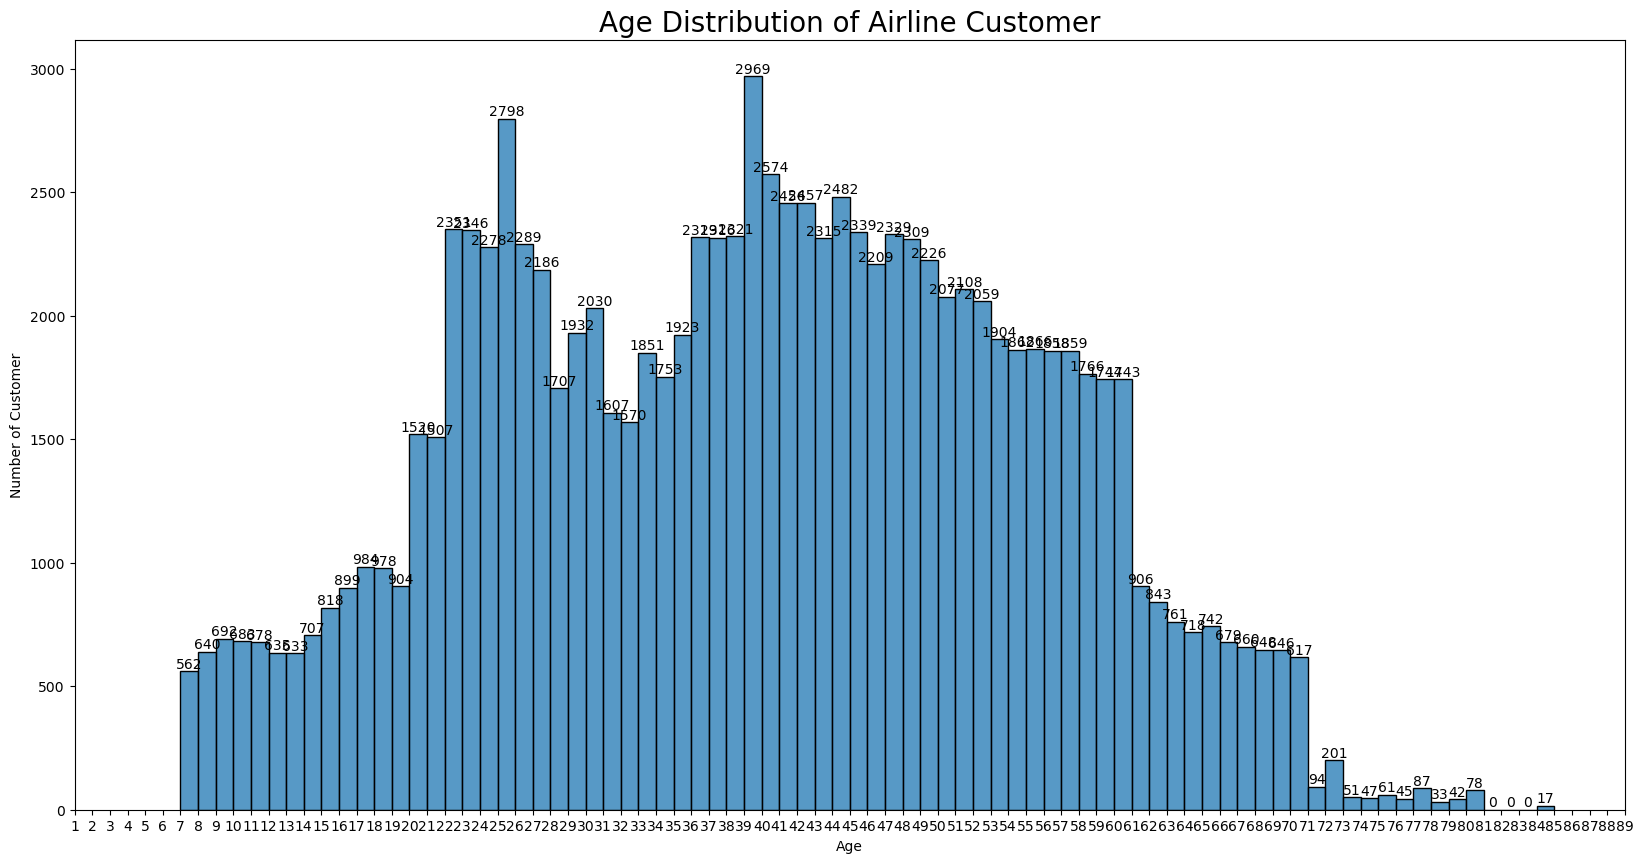

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_CPM, x='Age', binwidth=1)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Number of Customer')
plt.xticks(ticks=range(1,90,1))
plt.title('Age Distribution of Airline Customer', size=20)
plt.show()

In [ ]:
df_CPM[['Age']].describe()

,Age
count,103904.0000000000
mean,39.3797062673
std,15.1149636997
min,7.0000000000
25%,27.0000000000
50%,40.0000000000
75%,51.0000000000
max,85.0000000000


We can see from the figure and table above that:
- The oldest customers are 85 years old while the youngest are 7 years old.
- The highest amount of customer age is between 39-40 years old (2969 customers).
- The average age of customer is 39.38 years old

### Average Flight Distance by Satisfaction

In [ ]:
df_flight_distance_by_satisfaction = df_CPM.groupby('Satisfaction')[['Flight Distance']].mean().reset_index()

In [ ]:
df_flight_distance_by_satisfaction = df_flight_distance_by_satisfaction.rename(columns={0:'Number of Customer'})
df_flight_distance_by_satisfaction = df_flight_distance_by_satisfaction.sort_values(['Flight Distance', 'Satisfaction'])
df_flight_distance_by_satisfaction

,Satisfaction,Flight Distance
0,Neutral Or Dissatisfied,928.9199714669
1,Satisfied,1530.1402554137


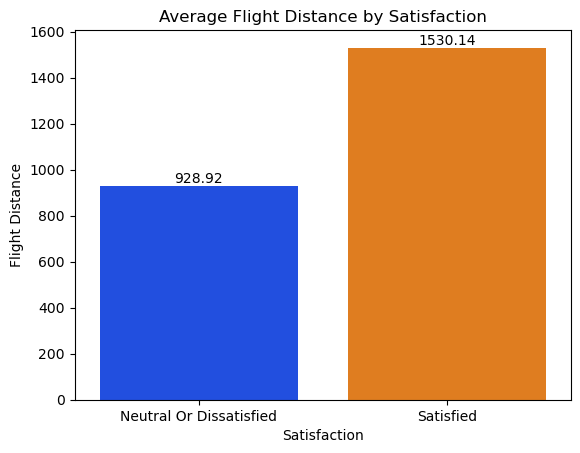

In [ ]:
ax = sns.barplot(data=df_flight_distance_by_satisfaction, x='Satisfaction', y='Flight Distance', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Average Flight Distance by Satisfaction')
plt.show()

From the table and figure above:
- The average flight distance for satisfied customers is higher (1530.14 km) than the dissatisfied/neutral customers (928.92 km)

### Average Flight Distance by Customer Type (Loyalty)

Now let us take a look at the flight distance by customer type

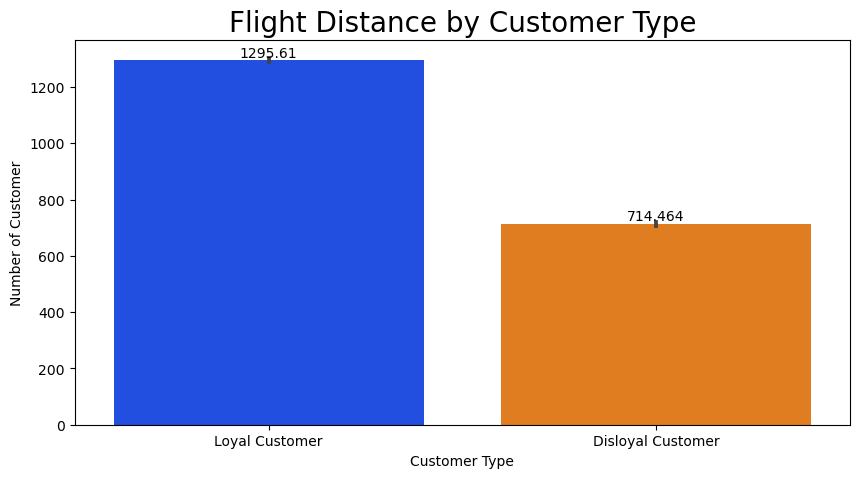

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_CPM, x='Customer Type', y='Flight Distance', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Number of Customer')
plt.title('Flight Distance by Customer Type', size=20)
plt.show()

In [ ]:
df_CPM.groupby('Customer Type').mean()[['Flight Distance']].reset_index()

,Customer Type,Flight Distance
0,Disloyal Customer,714.4638849376
1,Loyal Customer,1295.6113773654


According to the figure and table above:
- The average flight distance for loyal customers is higher (1295.61 km) than disloyal customers (714.46 km)

### Ratio of Satisfaction Level by Customer Type (Loyalty)

Let us find out the ratio of satisfied and dissatisfied/neutral customers based on their loyalty.

In [ ]:
# First, let us group them by their customer type and satisfaction level
df_satisfaction_by_customer_type = df_CPM.groupby('Customer Type')[['Satisfaction']].value_counts().reset_index()
df_satisfaction_by_customer_type

,Customer Type,Satisfaction,0
0,Disloyal Customer,Neutral Or Dissatisfied,14489
1,Disloyal Customer,Satisfied,4492
2,Loyal Customer,Neutral Or Dissatisfied,44390
3,Loyal Customer,Satisfied,40533


In [ ]:
# Don't forget to rename the column name '0' to 'Number of Customer'
df_satisfaction_by_customer_type = df_satisfaction_by_customer_type.rename(columns={0:'Number of Customer'})
df_satisfaction_by_customer_type

,Customer Type,Satisfaction,Number of Customer
0,Disloyal Customer,Neutral Or Dissatisfied,14489
1,Disloyal Customer,Satisfied,4492
2,Loyal Customer,Neutral Or Dissatisfied,44390
3,Loyal Customer,Satisfied,40533


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_customer_type = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_customer_type['Customer Type']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_customer_type.iloc[i,2]/(df_satisfaction_by_customer_type.iloc[i,2]+df_satisfaction_by_customer_type.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_customer_type.iloc[i,2]/(df_satisfaction_by_customer_type.iloc[i,2]+df_satisfaction_by_customer_type.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_customer_type.append(ratio)
list_ratio_customer_type

[0.7633422896580792,
 0.23665771034192087,
 0.5227088068014555,
 0.47729119319854457]

In [ ]:
# This is just for formatting purposes. To reduce the amount of numbers shown behind the decimal point
pd.set_option('float_format', '{:.2f}'.format)

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_customer_type['Ratio Percentage'] = list_ratio_customer_type

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_customer_type = df_satisfaction_by_customer_type.round(2)

df_satisfaction_by_customer_type['Ratio Percentage'] = df_satisfaction_by_customer_type['Ratio Percentage']*100
df_satisfaction_by_customer_type

,Customer Type,Satisfaction,Number of Customer,Ratio Percentage
0,Disloyal Customer,Neutral Or Dissatisfied,14489,76.00
1,Disloyal Customer,Satisfied,4492,24.00
2,Loyal Customer,Neutral Or Dissatisfied,44390,52.00
3,Loyal Customer,Satisfied,40533,48.00


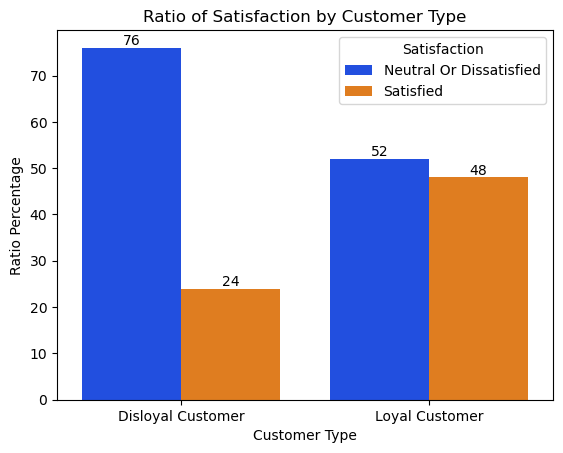

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_customer_type, x='Customer Type', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Ratio of Satisfaction by Customer Type')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Customer Type']].reset_index().rename(columns={'Customer Type':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- The ratio for satisfied and dissatisfied loyal customers is much more equal than the ratio on disloyal customers
- The highest ratio percentage for dissatisfied/neutral customers is at 76% by disloyal customers
- Majority of customers are dissatisfied/neutral with the services provided, doesn't matter whether they are loyal or disloyal customers

### Ratio of Satisfaction Level by Type Of Travel

In [ ]:
df_satisfaction_by_type_of_travel = df_CPM.groupby('Type Of Travel')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_type_of_travel = df_satisfaction_by_type_of_travel.rename(columns={0:'Number of Customer'})
df_satisfaction_by_type_of_travel = df_satisfaction_by_type_of_travel.sort_values(['Type Of Travel', 'Satisfaction'])
df_satisfaction_by_type_of_travel

,Type Of Travel,Satisfaction,Number of Customer
1,Business Travel,Neutral Or Dissatisfied,29909
0,Business Travel,Satisfied,41746
2,Personal Travel,Neutral Or Dissatisfied,28970
3,Personal Travel,Satisfied,3279


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_type_of_travel = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_type_of_travel['Type Of Travel']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_type_of_travel.iloc[i,2]/(df_satisfaction_by_type_of_travel.iloc[i,2]+df_satisfaction_by_type_of_travel.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_type_of_travel.iloc[i,2]/(df_satisfaction_by_type_of_travel.iloc[i,2]+df_satisfaction_by_type_of_travel.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_type_of_travel.append(ratio)
list_ratio_type_of_travel

[0.41740283301932873,
 0.5825971669806713,
 0.8983224286024373,
 0.10167757139756271]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_type_of_travel['Ratio Percentage'] = list_ratio_type_of_travel

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_type_of_travel = df_satisfaction_by_type_of_travel.round(2)

df_satisfaction_by_type_of_travel['Ratio Percentage'] = df_satisfaction_by_type_of_travel['Ratio Percentage']*100
df_satisfaction_by_type_of_travel

,Type Of Travel,Satisfaction,Number of Customer,Ratio Percentage
1,Business Travel,Neutral Or Dissatisfied,29909,42.00
0,Business Travel,Satisfied,41746,58.00
2,Personal Travel,Neutral Or Dissatisfied,28970,90.00
3,Personal Travel,Satisfied,3279,10.00


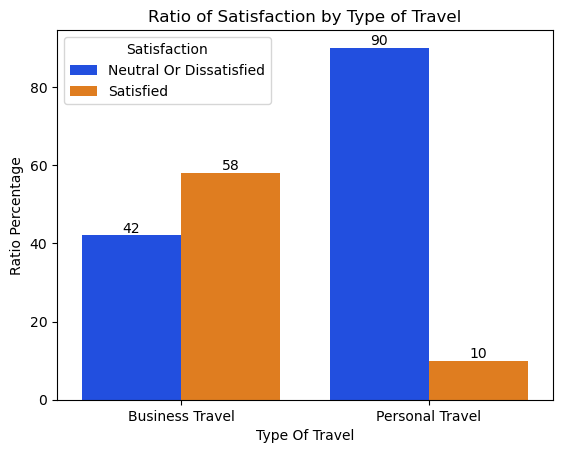

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_type_of_travel, x='Type Of Travel', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Ratio of Satisfaction by Type of Travel')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Type Of Travel']].reset_index().rename(columns={'Type Of Travel':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- The highest ratio percentage for dissatisfied/neutral customers is at an overwhelming 90% (Personal Travel group). On the other hand, the ratio percentage of satisfied customers for this group is only at 10%. Some drastic measures need to be done on this group
- Customers who travel for personal reasons have higher dissatisfaction/neutral ratio compared to customers who travel for business purposes

### Ratio of Satisfaction by Class

In [ ]:
df_satisfaction_by_class = df_CPM.groupby('Class')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_class = df_satisfaction_by_class.rename(columns={0:'Number of Customer'})
df_satisfaction_by_class = df_satisfaction_by_class.sort_values(['Class', 'Satisfaction'])
df_satisfaction_by_class

,Class,Satisfaction,Number of Customer
1,Business,Neutral Or Dissatisfied,15185
0,Business,Satisfied,34480
2,Eco,Neutral Or Dissatisfied,38044
3,Eco,Satisfied,8701
4,Eco Plus,Neutral Or Dissatisfied,5650
5,Eco Plus,Satisfied,1844


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_class = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_class['Class']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_class.iloc[i,2]/(df_satisfaction_by_class.iloc[i,2]+df_satisfaction_by_class.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_class.iloc[i,2]/(df_satisfaction_by_class.iloc[i,2]+df_satisfaction_by_class.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_class.append(ratio)
list_ratio_class

[0.3057485150508406,
 0.6942514849491593,
 0.8138624451813028,
 0.18613755481869718,
 0.7539364825193489,
 0.2460635174806512]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_class['Ratio Percentage'] = list_ratio_class

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_class = df_satisfaction_by_class.round(2)

df_satisfaction_by_class['Ratio Percentage'] = df_satisfaction_by_class['Ratio Percentage']*100
df_satisfaction_by_class

,Class,Satisfaction,Number of Customer,Ratio Percentage
1,Business,Neutral Or Dissatisfied,15185,31.00
0,Business,Satisfied,34480,69.00
2,Eco,Neutral Or Dissatisfied,38044,81.00
3,Eco,Satisfied,8701,19.00
4,Eco Plus,Neutral Or Dissatisfied,5650,75.00
5,Eco Plus,Satisfied,1844,25.00


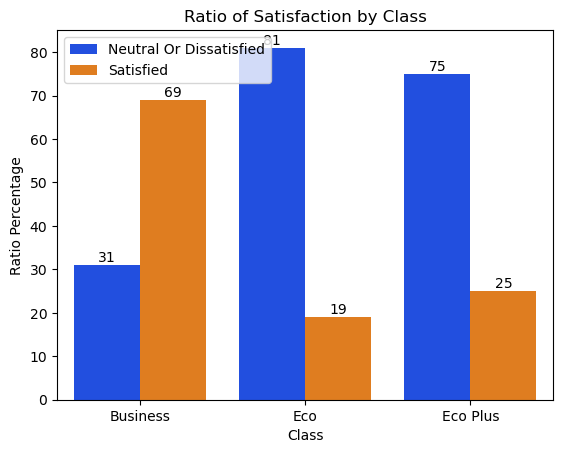

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_class, x='Class', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper left')
plt.title('Ratio of Satisfaction by Class')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Class']].reset_index().rename(columns={'Class':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- The class that has the biggest difference in ratio percentage of satisfaction level is Eco Class, followed by Eco Plus Class and Business Class. More effort should be given as priority to Eco and Eco Plus Class
- The amount of satisfied passengers in Business Class is the highest among the other classes. It also has higher satisfied than dissatisfied/neutral customers

### Ratio of Satisfaction by Inflight Wifi Service

In [ ]:
df_satisfaction_by_wifi = df_CPM.groupby('Inflight Wifi Service')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_wifi = df_satisfaction_by_wifi.rename(columns={0:'Number of Customer'})
df_satisfaction_by_wifi = df_satisfaction_by_wifi.sort_values(['Inflight Wifi Service', 'Satisfaction'])
df_satisfaction_by_wifi

,Inflight Wifi Service,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,12034
1,1,Satisfied,5806
2,2,Neutral Or Dissatisfied,19407
3,2,Satisfied,6423
4,3,Neutral Or Dissatisfied,19394
5,3,Satisfied,9577
7,4,Neutral Or Dissatisfied,7938
6,4,Satisfied,11856
9,5,Neutral Or Dissatisfied,106
8,5,Satisfied,11363


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_wifi = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_wifi['Inflight Wifi Service']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_wifi.iloc[i,2]/(df_satisfaction_by_wifi.iloc[i,2]+df_satisfaction_by_wifi.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_wifi.iloc[i,2]/(df_satisfaction_by_wifi.iloc[i,2]+df_satisfaction_by_wifi.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_wifi.append(ratio)
list_ratio_wifi

[0.6745515695067265,
 0.32544843049327354,
 0.751335656213705,
 0.248664343786295,
 0.6694280487383936,
 0.33057195126160643,
 0.40103061533798123,
 0.5989693846620188,
 0.009242305344842619,
 0.9907576946551574]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_wifi['Ratio Percentage'] = list_ratio_wifi

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_wifi = df_satisfaction_by_wifi.round(2)

df_satisfaction_by_wifi['Ratio Percentage'] = df_satisfaction_by_wifi['Ratio Percentage']*100
df_satisfaction_by_wifi

,Inflight Wifi Service,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,12034,67.00
1,1,Satisfied,5806,33.00
2,2,Neutral Or Dissatisfied,19407,75.00
3,2,Satisfied,6423,25.00
4,3,Neutral Or Dissatisfied,19394,67.00
5,3,Satisfied,9577,33.00
7,4,Neutral Or Dissatisfied,7938,40.00
6,4,Satisfied,11856,60.00
9,5,Neutral Or Dissatisfied,106,1.00
8,5,Satisfied,11363,99.00


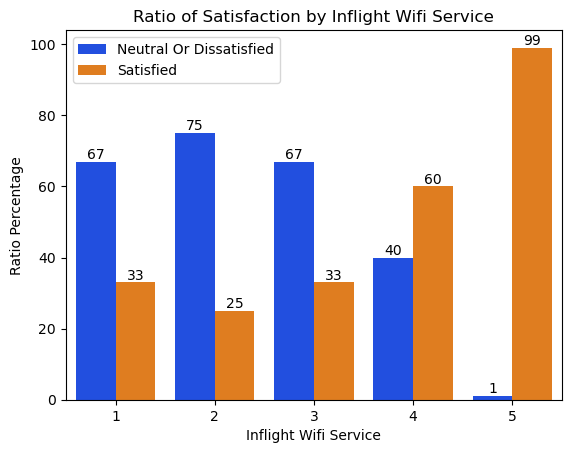

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_wifi, x='Inflight Wifi Service', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper left')
plt.title('Ratio of Satisfaction by Inflight Wifi Service')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Inflight Wifi Service']].reset_index().rename(columns={'Inflight Wifi Service':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


Based from the table and figure above:
- Customers who rated '5' for the Inflight Wifi Service has the highest ratio of satisfaction compared to other group
- There are more customers who are dissatisfied/neutral with the inflight wifi service than satisfied customers
- For the customers who rated '1-3', the ratio of dissatisfaction/neutral is far larger than the satisfied customers. Some adjustments need to be done to improve the Inflight Wifi Service. Example: increase the internet speed, lower the wifi price/make it free

### Ratio of Satisfaction by Departure/Arrival Time Convenient

In [ ]:
df_satisfaction_by_time_convenient = df_CPM.groupby('Departure/Arrival Time Convenient')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_time_convenient = df_satisfaction_by_time_convenient.rename(columns={0:'Number of Customer'})
df_satisfaction_by_time_convenient = df_satisfaction_by_time_convenient.sort_values(['Departure/Arrival Time Convenient', 'Satisfaction'])
df_satisfaction_by_time_convenient

,Departure/Arrival Time Convenient,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,7957
1,1,Satisfied,7541
2,2,Neutral Or Dissatisfied,9534
3,2,Satisfied,7657
4,3,Neutral Or Dissatisfied,12873
5,3,Satisfied,10393
6,4,Neutral Or Dissatisfied,15640
7,4,Satisfied,9906
8,5,Neutral Or Dissatisfied,12875
9,5,Satisfied,9528


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_time_convenient = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_time_convenient['Departure/Arrival Time Convenient']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_time_convenient.iloc[i,2]/(df_satisfaction_by_time_convenient.iloc[i,2]+df_satisfaction_by_time_convenient.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_time_convenient.iloc[i,2]/(df_satisfaction_by_time_convenient.iloc[i,2]+df_satisfaction_by_time_convenient.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_time_convenient.append(ratio)
list_ratio_time_convenient

[0.5134210865918183,
 0.4865789134081817,
 0.5545925193415159,
 0.44540748065848407,
 0.5532966560646437,
 0.4467033439353563,
 0.6122289203789243,
 0.3877710796210757,
 0.5746998169887961,
 0.42530018301120387]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_time_convenient['Ratio Percentage'] = list_ratio_time_convenient

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_time_convenient = df_satisfaction_by_time_convenient.round(2)

df_satisfaction_by_time_convenient['Ratio Percentage'] = df_satisfaction_by_time_convenient['Ratio Percentage']*100
df_satisfaction_by_time_convenient

,Departure/Arrival Time Convenient,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,7957,51.00
1,1,Satisfied,7541,49.00
2,2,Neutral Or Dissatisfied,9534,55.00
3,2,Satisfied,7657,45.00
4,3,Neutral Or Dissatisfied,12873,55.00
5,3,Satisfied,10393,45.00
6,4,Neutral Or Dissatisfied,15640,61.00
7,4,Satisfied,9906,39.00
8,5,Neutral Or Dissatisfied,12875,57.00
9,5,Satisfied,9528,43.00


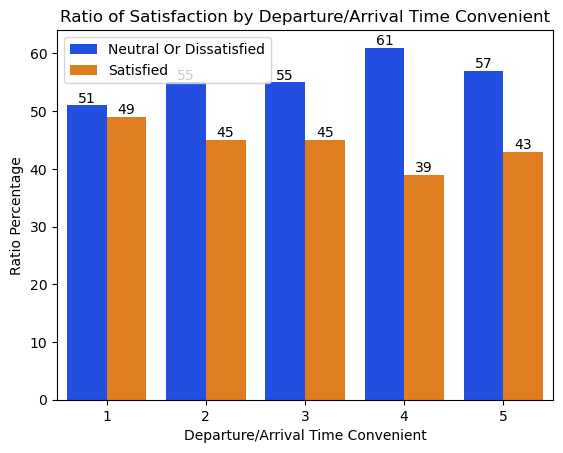

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_time_convenient, x='Departure/Arrival Time Convenient', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper left')
plt.title('Ratio of Satisfaction by Departure/Arrival Time Convenient')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Departure/Arrival Time Convenient']].reset_index().rename(columns={'Departure/Arrival Time Convenient':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- All rating score has higher dissatisfied/neutral customers than satisfied customers. This is an extremely critical issue and need to be reviewed immediately

### Ratio of Satisfaction by Ease Of Online Booking

In [ ]:
df_satisfaction_by_ease_of_online_booking = df_CPM.groupby('Ease Of Online Booking')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_ease_of_online_booking = df_satisfaction_by_ease_of_online_booking.rename(columns={0:'Number of Customer'})
df_satisfaction_by_ease_of_online_booking = df_satisfaction_by_ease_of_online_booking.sort_values(['Ease Of Online Booking', 'Satisfaction'])
df_satisfaction_by_ease_of_online_booking

,Ease Of Online Booking,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,10935
1,1,Satisfied,6590
2,2,Neutral Or Dissatisfied,16720
3,2,Satisfied,7301
4,3,Neutral Or Dissatisfied,18419
5,3,Satisfied,10517
7,4,Neutral Or Dissatisfied,9180
6,4,Satisfied,10391
9,5,Neutral Or Dissatisfied,3625
8,5,Satisfied,10226


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_ease_online_booking = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_ease_of_online_booking['Ease Of Online Booking']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_ease_of_online_booking.iloc[i,2]/(df_satisfaction_by_ease_of_online_booking.iloc[i,2]+df_satisfaction_by_ease_of_online_booking.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_ease_of_online_booking.iloc[i,2]/(df_satisfaction_by_ease_of_online_booking.iloc[i,2]+df_satisfaction_by_ease_of_online_booking.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_ease_online_booking.append(ratio)
list_ratio_ease_online_booking

[0.6239657631954351,
 0.3760342368045649,
 0.6960576162524458,
 0.3039423837475542,
 0.6365427149571468,
 0.3634572850428532,
 0.4690613663072914,
 0.5309386336927086,
 0.2617139556710707,
 0.7382860443289293]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_ease_of_online_booking['Ratio Percentage'] = list_ratio_ease_online_booking

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_ease_of_online_booking = df_satisfaction_by_ease_of_online_booking.round(2)

df_satisfaction_by_ease_of_online_booking['Ratio Percentage'] = df_satisfaction_by_ease_of_online_booking['Ratio Percentage']*100
df_satisfaction_by_ease_of_online_booking

,Ease Of Online Booking,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,10935,62.00
1,1,Satisfied,6590,38.00
2,2,Neutral Or Dissatisfied,16720,70.00
3,2,Satisfied,7301,30.00
4,3,Neutral Or Dissatisfied,18419,64.00
5,3,Satisfied,10517,36.00
7,4,Neutral Or Dissatisfied,9180,47.00
6,4,Satisfied,10391,53.00
9,5,Neutral Or Dissatisfied,3625,26.00
8,5,Satisfied,10226,74.00


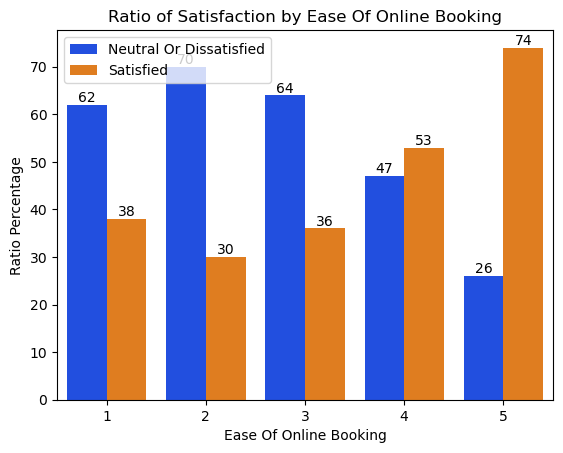

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_ease_of_online_booking, x='Ease Of Online Booking', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper left')
plt.title('Ratio of Satisfaction by Ease Of Online Booking')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Ease Of Online Booking']].reset_index().rename(columns={'Ease Of Online Booking':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- Most customers tend to be dissatisfied/neutral and rated lower for this category. Some improvements need to be done. Example: improvement of UI/UX, increase online payment methods, minimize booking steps.

### Ratio of Satisfaction by Gate Location

In [ ]:
df_satisfaction_by_gate_location = df_CPM.groupby('Gate Location')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_gate_location = df_satisfaction_by_gate_location.rename(columns={0:'Number of Customer'})
df_satisfaction_by_gate_location = df_satisfaction_by_gate_location.sort_values(['Gate Location', 'Satisfaction'])
df_satisfaction_by_gate_location

,Gate Location,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,8859
1,1,Satisfied,8703
2,2,Neutral Or Dissatisfied,10494
3,2,Satisfied,8965
4,3,Neutral Or Dissatisfied,18655
5,3,Satisfied,9923
6,4,Neutral Or Dissatisfied,14936
7,4,Satisfied,9490
9,5,Neutral Or Dissatisfied,5935
8,5,Satisfied,7944


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_gate_location = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_gate_location['Gate Location']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_gate_location.iloc[i,2]/(df_satisfaction_by_gate_location.iloc[i,2]+df_satisfaction_by_gate_location.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_gate_location.iloc[i,2]/(df_satisfaction_by_gate_location.iloc[i,2]+df_satisfaction_by_gate_location.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_gate_location.append(ratio)
list_ratio_gate_location

[0.5044414075845576,
 0.4955585924154424,
 0.539287733182589,
 0.46071226681741095,
 0.6527748617817902,
 0.34722513821820983,
 0.6114795709489887,
 0.3885204290510112,
 0.4276244686216586,
 0.5723755313783414]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_gate_location['Ratio Percentage'] = list_ratio_gate_location

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_gate_location = df_satisfaction_by_gate_location.round(2)

df_satisfaction_by_gate_location['Ratio Percentage'] = df_satisfaction_by_gate_location['Ratio Percentage']*100
df_satisfaction_by_gate_location

,Gate Location,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,8859,50.00
1,1,Satisfied,8703,50.00
2,2,Neutral Or Dissatisfied,10494,54.00
3,2,Satisfied,8965,46.00
4,3,Neutral Or Dissatisfied,18655,65.00
5,3,Satisfied,9923,35.00
6,4,Neutral Or Dissatisfied,14936,61.00
7,4,Satisfied,9490,39.00
9,5,Neutral Or Dissatisfied,5935,43.00
8,5,Satisfied,7944,57.00


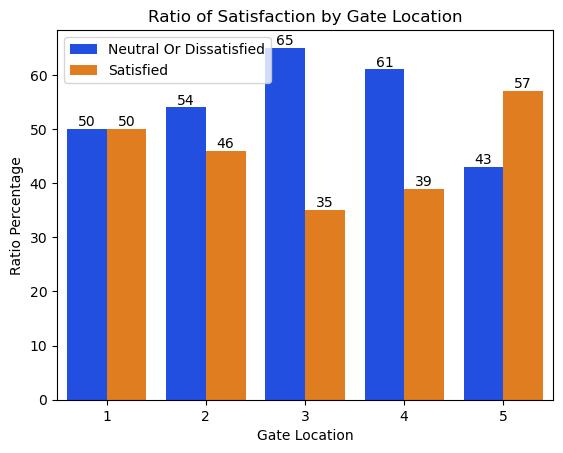

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_gate_location, x='Gate Location', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper left')
plt.title('Ratio of Satisfaction by Gate Location')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Gate Location']].reset_index().rename(columns={'Gate Location':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- The number of satisfied and dissatisfied/neutral that rated '1' is roughly similar
- The majority of customers are dissatisfied/neutral with the gate location. Improvements are advisable

### Ratio of Satisfaction by Food and Drink

In [ ]:
df_satisfaction_by_fnb = df_CPM.groupby('Food And Drink')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_fnb = df_satisfaction_by_fnb.rename(columns={0:'Number of Customer'})
df_satisfaction_by_fnb = df_satisfaction_by_fnb.sort_values(['Food And Drink', 'Satisfaction'])
df_satisfaction_by_fnb

,Food And Drink,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,10269
1,1,Satisfied,2568
2,2,Neutral Or Dissatisfied,13458
3,2,Satisfied,8530
4,3,Neutral Or Dissatisfied,13518
5,3,Satisfied,8889
7,4,Neutral Or Dissatisfied,11571
6,4,Satisfied,12788
9,5,Neutral Or Dissatisfied,10063
8,5,Satisfied,12250


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_fnb = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_fnb['Food And Drink']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_fnb.iloc[i,2]/(df_satisfaction_by_fnb.iloc[i,2]+df_satisfaction_by_fnb.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_fnb.iloc[i,2]/(df_satisfaction_by_fnb.iloc[i,2]+df_satisfaction_by_fnb.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_fnb.append(ratio)
list_ratio_fnb

[0.7999532601075018,
 0.20004673989249824,
 0.6120611242495907,
 0.3879388757504093,
 0.6032936136028919,
 0.39670638639710804,
 0.4750194999794737,
 0.5249805000205263,
 0.4509926948415722,
 0.5490073051584278]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_fnb['Ratio Percentage'] = list_ratio_fnb

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_fnb = df_satisfaction_by_fnb.round(2)

df_satisfaction_by_fnb['Ratio Percentage'] = df_satisfaction_by_fnb['Ratio Percentage']*100
df_satisfaction_by_fnb

,Food And Drink,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,10269,80.00
1,1,Satisfied,2568,20.00
2,2,Neutral Or Dissatisfied,13458,61.00
3,2,Satisfied,8530,39.00
4,3,Neutral Or Dissatisfied,13518,60.00
5,3,Satisfied,8889,40.00
7,4,Neutral Or Dissatisfied,11571,48.00
6,4,Satisfied,12788,52.00
9,5,Neutral Or Dissatisfied,10063,45.00
8,5,Satisfied,12250,55.00


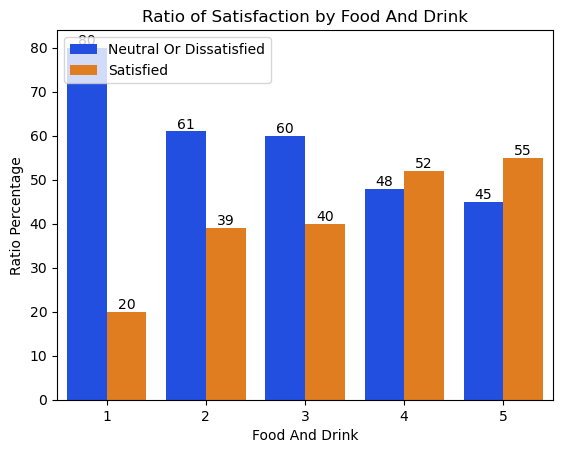

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_fnb, x='Food And Drink', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper left')
plt.title('Ratio of Satisfaction by Food And Drink')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Food And Drink']].reset_index().rename(columns={'Food And Drink':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- Most customers are dissatisfied/neutral with the food and drink provided. Some improvements are necessary. Example: improve the quality and taste of food and drink, lower the price (and at the same time, reduce the portion to maintain profit)

### Ratio of Satisfaction by Online Boarding

In [ ]:
df_satisfaction_by_online_boarding = df_CPM.groupby('Online Boarding')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_online_boarding = df_satisfaction_by_online_boarding.rename(columns={0:'Number of Customer'})
df_satisfaction_by_online_boarding = df_satisfaction_by_online_boarding.sort_values(['Online Boarding', 'Satisfaction'])
df_satisfaction_by_online_boarding

,Online Boarding,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,9219
1,1,Satisfied,1473
2,2,Neutral Or Dissatisfied,15486
3,2,Satisfied,2019
4,3,Neutral Or Dissatisfied,19922
5,3,Satisfied,4310
7,4,Neutral Or Dissatisfied,11596
6,4,Satisfied,19166
9,5,Neutral Or Dissatisfied,2656
8,5,Satisfied,18057


In [ ]:
# First, create an empty list to store the ratio later on
list_Ratio_online_boarding = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_online_boarding['Online Boarding']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_online_boarding.iloc[i,2]/(df_satisfaction_by_online_boarding.iloc[i,2]+df_satisfaction_by_online_boarding.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_online_boarding.iloc[i,2]/(df_satisfaction_by_online_boarding.iloc[i,2]+df_satisfaction_by_online_boarding.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_Ratio_online_boarding.append(ratio)
list_Ratio_online_boarding

[0.8622334455667789,
 0.1377665544332211,
 0.8846615252784918,
 0.11533847472150814,
 0.8221360184879498,
 0.17786398151205018,
 0.3769585852675379,
 0.6230414147324621,
 0.12822864867474532,
 0.8717713513252546]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_online_boarding['Ratio Percentage'] = list_Ratio_online_boarding

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_online_boarding = df_satisfaction_by_online_boarding.round(2)

df_satisfaction_by_online_boarding['Ratio Percentage'] = df_satisfaction_by_online_boarding['Ratio Percentage']*100
df_satisfaction_by_online_boarding

,Online Boarding,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,9219,86.00
1,1,Satisfied,1473,14.00
2,2,Neutral Or Dissatisfied,15486,88.00
3,2,Satisfied,2019,12.00
4,3,Neutral Or Dissatisfied,19922,82.00
5,3,Satisfied,4310,18.00
7,4,Neutral Or Dissatisfied,11596,38.00
6,4,Satisfied,19166,62.00
9,5,Neutral Or Dissatisfied,2656,13.00
8,5,Satisfied,18057,87.00


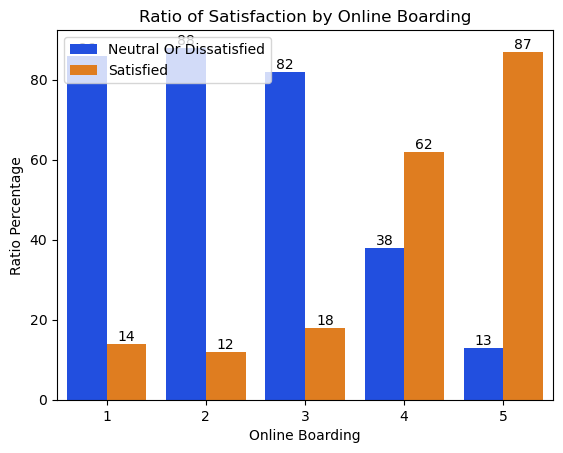

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_online_boarding, x='Online Boarding', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper left')
plt.title('Ratio of Satisfaction by Online Boarding')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Online Boarding']].reset_index().rename(columns={'Online Boarding':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- The majority of customers are dissatisfied/neutral with the online boarding system. Some improvements are needed

### Ratio of Satisfaction by Seat Comfort

In [ ]:
df_satisfaction_by_seat_comfort = df_CPM.groupby('Seat Comfort')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_seat_comfort = df_satisfaction_by_seat_comfort.rename(columns={0:'Number of Customer'})
df_satisfaction_by_seat_comfort = df_satisfaction_by_seat_comfort.sort_values(['Seat Comfort', 'Satisfaction'])
df_satisfaction_by_seat_comfort

,Seat Comfort,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,9380
1,1,Satisfied,2695
2,2,Neutral Or Dissatisfied,11558
3,2,Satisfied,3339
4,3,Neutral Or Dissatisfied,14741
5,3,Satisfied,3955
7,4,Neutral Or Dissatisfied,13941
6,4,Satisfied,17825
9,5,Neutral Or Dissatisfied,9259
8,5,Satisfied,17211


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_seat_comfort = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_seat_comfort['Seat Comfort']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_seat_comfort.iloc[i,2]/(df_satisfaction_by_seat_comfort.iloc[i,2]+df_satisfaction_by_seat_comfort.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_seat_comfort.iloc[i,2]/(df_satisfaction_by_seat_comfort.iloc[i,2]+df_satisfaction_by_seat_comfort.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_seat_comfort.append(ratio)
list_ratio_seat_comfort

[0.7768115942028986,
 0.22318840579710145,
 0.7758609115929381,
 0.22413908840706182,
 0.7884574240479247,
 0.21154257595207532,
 0.43886545362966695,
 0.5611345463703331,
 0.34979221760483564,
 0.6502077823951643]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_seat_comfort['Ratio Percentage'] = list_ratio_seat_comfort

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_seat_comfort = df_satisfaction_by_seat_comfort.round(2)

df_satisfaction_by_seat_comfort['Ratio Percentage'] = df_satisfaction_by_seat_comfort['Ratio Percentage']*100
df_satisfaction_by_seat_comfort

,Seat Comfort,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,9380,78.00
1,1,Satisfied,2695,22.00
2,2,Neutral Or Dissatisfied,11558,78.00
3,2,Satisfied,3339,22.00
4,3,Neutral Or Dissatisfied,14741,79.00
5,3,Satisfied,3955,21.00
7,4,Neutral Or Dissatisfied,13941,44.00
6,4,Satisfied,17825,56.00
9,5,Neutral Or Dissatisfied,9259,35.00
8,5,Satisfied,17211,65.00


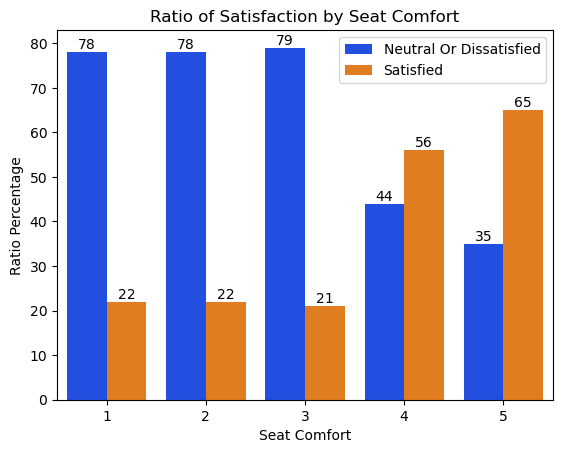

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_seat_comfort, x='Seat Comfort', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper right')
plt.title('Ratio of Satisfaction by Seat Comfort')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Seat Comfort']].reset_index().rename(columns={'Seat Comfort':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- The majority of customers are dissatisfied/neutral with the seat provided. Some adjustments are necessary. Example: widen the seating area, use softer material for seat cushion, widen the arm rest.

### Ratio of Satisfaction by Leg Room Service

In [ ]:
df_satisfaction_by_leg_room = df_CPM.groupby('Leg Room Service')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_leg_room = df_satisfaction_by_leg_room.rename(columns={0:'Number of Customer'})
df_satisfaction_by_leg_room = df_satisfaction_by_leg_room.sort_values(['Leg Room Service', 'Satisfaction'])
df_satisfaction_by_leg_room

,Leg Room Service,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,8253
1,1,Satisfied,2100
2,2,Neutral Or Dissatisfied,14162
3,2,Satisfied,5363
4,3,Neutral Or Dissatisfied,14623
5,3,Satisfied,5475
7,4,Neutral Or Dissatisfied,12331
6,4,Satisfied,16930
9,5,Neutral Or Dissatisfied,9510
8,5,Satisfied,15157


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_leg_room = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_leg_room['Leg Room Service']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_leg_room.iloc[i,2]/(df_satisfaction_by_leg_room.iloc[i,2]+df_satisfaction_by_leg_room.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_leg_room.iloc[i,2]/(df_satisfaction_by_leg_room.iloc[i,2]+df_satisfaction_by_leg_room.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_leg_room.append(ratio)
list_ratio_leg_room

[0.7971602434077079,
 0.2028397565922921,
 0.7253265044814341,
 0.27467349551856596,
 0.7275848343118718,
 0.2724151656881282,
 0.4214141690304501,
 0.57858583096955,
 0.3855353306036405,
 0.6144646693963595]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_leg_room['Ratio Percentage'] = list_ratio_leg_room

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_leg_room = df_satisfaction_by_leg_room.round(2)

df_satisfaction_by_leg_room['Ratio Percentage'] = df_satisfaction_by_leg_room['Ratio Percentage']*100
df_satisfaction_by_leg_room

,Leg Room Service,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,8253,80.00
1,1,Satisfied,2100,20.00
2,2,Neutral Or Dissatisfied,14162,73.00
3,2,Satisfied,5363,27.00
4,3,Neutral Or Dissatisfied,14623,73.00
5,3,Satisfied,5475,27.00
7,4,Neutral Or Dissatisfied,12331,42.00
6,4,Satisfied,16930,58.00
9,5,Neutral Or Dissatisfied,9510,39.00
8,5,Satisfied,15157,61.00


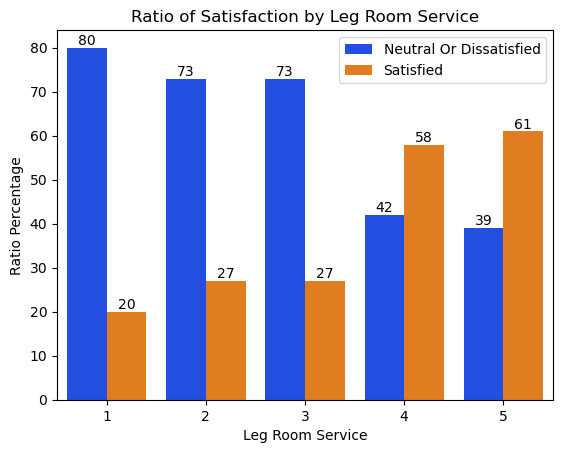

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_leg_room, x='Leg Room Service', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper right')
plt.title('Ratio of Satisfaction by Leg Room Service')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Leg Room Service']].reset_index().rename(columns={'Leg Room Service':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- Most customers are dissatisfied/neutral with the leg room provided. Adjustments are necessary. Example: increase the leg room space

### Ratio of Satisfaction by Baggage Handling

In [ ]:
df_satisfaction_by_baggage_handling = df_CPM.groupby('Baggage Handling')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_baggage_handling = df_satisfaction_by_baggage_handling.rename(columns={0:'Number of Customer'})
df_satisfaction_by_baggage_handling = df_satisfaction_by_baggage_handling.sort_values(['Baggage Handling', 'Satisfaction'])
df_satisfaction_by_baggage_handling

,Baggage Handling,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,5083
1,1,Satisfied,2154
2,2,Neutral Or Dissatisfied,8117
3,2,Satisfied,3404
4,3,Neutral Or Dissatisfied,15766
5,3,Satisfied,4866
6,4,Neutral Or Dissatisfied,19405
7,4,Satisfied,17978
9,5,Neutral Or Dissatisfied,10508
8,5,Satisfied,16623


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_baggage_handling = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_baggage_handling['Baggage Handling']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_baggage_handling.iloc[i,2]/(df_satisfaction_by_baggage_handling.iloc[i,2]+df_satisfaction_by_baggage_handling.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_baggage_handling.iloc[i,2]/(df_satisfaction_by_baggage_handling.iloc[i,2]+df_satisfaction_by_baggage_handling.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_baggage_handling.append(ratio)
list_ratio_baggage_handling

[0.7023628575376537,
 0.2976371424623463,
 0.7045395364985678,
 0.2954604635014322,
 0.7641527723924002,
 0.23584722760759985,
 0.5190862156595244,
 0.4809137843404756,
 0.3873060336884007,
 0.6126939663115992]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_baggage_handling['Ratio Percentage'] = list_ratio_baggage_handling

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_baggage_handling = df_satisfaction_by_baggage_handling.round(2)

df_satisfaction_by_baggage_handling['Ratio Percentage'] = df_satisfaction_by_baggage_handling['Ratio Percentage']*100
df_satisfaction_by_baggage_handling

,Baggage Handling,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,5083,70.00
1,1,Satisfied,2154,30.00
2,2,Neutral Or Dissatisfied,8117,70.00
3,2,Satisfied,3404,30.00
4,3,Neutral Or Dissatisfied,15766,76.00
5,3,Satisfied,4866,24.00
6,4,Neutral Or Dissatisfied,19405,52.00
7,4,Satisfied,17978,48.00
9,5,Neutral Or Dissatisfied,10508,39.00
8,5,Satisfied,16623,61.00


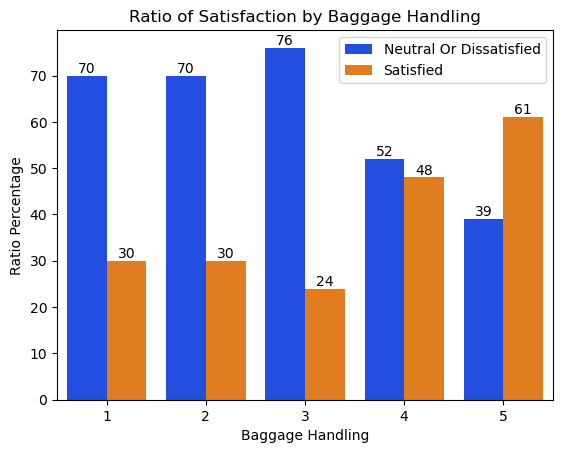

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_baggage_handling, x='Baggage Handling', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper right')
plt.title('Ratio of Satisfaction by Baggage Handling')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Baggage Handling']].reset_index().rename(columns={'Baggage Handling':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- The majority of customers are dissatisfied/neutral with the baggage handling service. Some improvements are recommended. Example: increase the efficiency of baggage handling process by using automated machinery instead of human workers. This is also great to reduce labor cost

### Ratio of Satisfaction by Check-in Service

In [ ]:
df_satisfaction_by_checkin_service = df_CPM.groupby('Checkin Service')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_checkin_service = df_satisfaction_by_checkin_service.rename(columns={0:'Number of Customer'})
df_satisfaction_by_checkin_service = df_satisfaction_by_checkin_service.sort_values(['Checkin Service', 'Satisfaction'])
df_satisfaction_by_checkin_service

,Checkin Service,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,9806
1,1,Satisfied,3084
2,2,Neutral Or Dissatisfied,9640
3,2,Satisfied,3253
4,3,Neutral Or Dissatisfied,15695
5,3,Satisfied,12752
6,4,Neutral Or Dissatisfied,15692
7,4,Satisfied,13363
9,5,Neutral Or Dissatisfied,8046
8,5,Satisfied,12573


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_checkin_service = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_checkin_service['Checkin Service']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_checkin_service.iloc[i,2]/(df_satisfaction_by_checkin_service.iloc[i,2]+df_satisfaction_by_checkin_service.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_checkin_service.iloc[i,2]/(df_satisfaction_by_checkin_service.iloc[i,2]+df_satisfaction_by_checkin_service.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_checkin_service.append(ratio)
list_ratio_checkin_service

[0.760744763382467,
 0.23925523661753298,
 0.7476925463429768,
 0.2523074536570232,
 0.5517277744577636,
 0.44827222554223645,
 0.5400791602133884,
 0.4599208397866116,
 0.3902226102138804,
 0.6097773897861196]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_checkin_service['Ratio Percentage'] = list_ratio_checkin_service

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_checkin_service = df_satisfaction_by_checkin_service.round(2)

df_satisfaction_by_checkin_service['Ratio Percentage'] = df_satisfaction_by_checkin_service['Ratio Percentage']*100
df_satisfaction_by_checkin_service

,Checkin Service,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,9806,76.00
1,1,Satisfied,3084,24.00
2,2,Neutral Or Dissatisfied,9640,75.00
3,2,Satisfied,3253,25.00
4,3,Neutral Or Dissatisfied,15695,55.00
5,3,Satisfied,12752,45.00
6,4,Neutral Or Dissatisfied,15692,54.00
7,4,Satisfied,13363,46.00
9,5,Neutral Or Dissatisfied,8046,39.00
8,5,Satisfied,12573,61.00


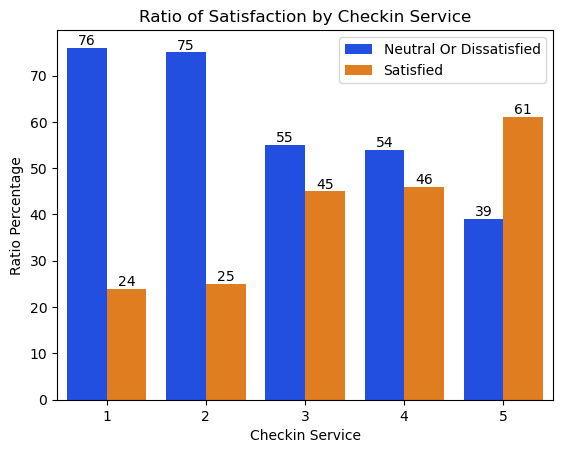

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_checkin_service, x='Checkin Service', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper right')
plt.title('Ratio of Satisfaction by Checkin Service')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Checkin Service']].reset_index().rename(columns={'Checkin Service':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- The majority of customers are dissatisfied/neutral with the check-in service
- Almost all rating group (1-4) are dissatisfied/neutral with the check-in service. Some immediate changes are required. Example: improve the behavior and SOPs of the PIC at the check-in counters, isntall self check-in counter at major airports

### Ratio of Satisfaction by Inflight Service

In [ ]:
df_satisfaction_by_inflight_service = df_CPM.groupby('Inflight Service')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_inflight_service = df_satisfaction_by_inflight_service.rename(columns={0:'Number of Customer'})
df_satisfaction_by_inflight_service = df_satisfaction_by_inflight_service.sort_values(['Inflight Service', 'Satisfaction'])
df_satisfaction_by_inflight_service

,Inflight Service,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,5030
1,1,Satisfied,2054
2,2,Neutral Or Dissatisfied,8006
3,2,Satisfied,3451
4,3,Neutral Or Dissatisfied,15448
5,3,Satisfied,4851
6,4,Neutral Or Dissatisfied,19819
7,4,Satisfied,18129
9,5,Neutral Or Dissatisfied,10576
8,5,Satisfied,16540


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_inflight_service = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_inflight_service['Inflight Service']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_inflight_service.iloc[i,2]/(df_satisfaction_by_inflight_service.iloc[i,2]+df_satisfaction_by_inflight_service.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_inflight_service.iloc[i,2]/(df_satisfaction_by_inflight_service.iloc[i,2]+df_satisfaction_by_inflight_service.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_inflight_service.append(ratio)
list_ratio_inflight_service

[0.7100508187464709,
 0.2899491812535291,
 0.6987867679148119,
 0.3012132320851881,
 0.7610227104783487,
 0.23897728952165131,
 0.5222673131653842,
 0.4777326868346158,
 0.39002802773270395,
 0.609971972267296]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_inflight_service['Ratio Percentage'] = list_ratio_inflight_service

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_inflight_service = df_satisfaction_by_inflight_service.round(2)

df_satisfaction_by_inflight_service['Ratio Percentage'] = df_satisfaction_by_inflight_service['Ratio Percentage']*100
df_satisfaction_by_inflight_service

,Inflight Service,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,5030,71.00
1,1,Satisfied,2054,29.00
2,2,Neutral Or Dissatisfied,8006,70.00
3,2,Satisfied,3451,30.00
4,3,Neutral Or Dissatisfied,15448,76.00
5,3,Satisfied,4851,24.00
6,4,Neutral Or Dissatisfied,19819,52.00
7,4,Satisfied,18129,48.00
9,5,Neutral Or Dissatisfied,10576,39.00
8,5,Satisfied,16540,61.00


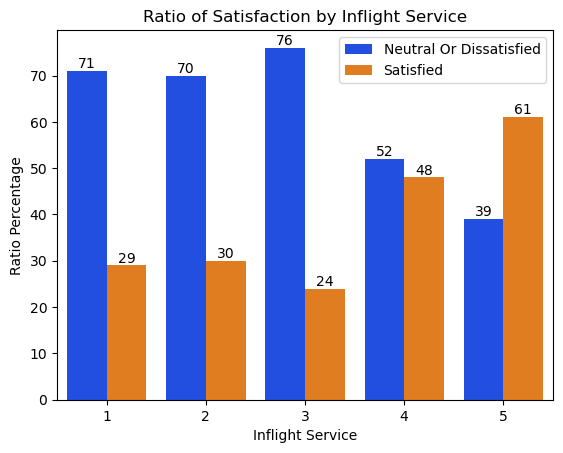

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_inflight_service, x='Inflight Service', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper right')
plt.title('Ratio of Satisfaction by Inflight Service')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Inflight Service']].reset_index().rename(columns={'Inflight Service':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- Almost all rating group (1-4) are dissatisfied/neutral with the inflight service provided
- Most of the customers are dissatisfied/neutral with the inflight service provided. Immediate adjustments are necessary. Example: improve the flight attendants' ability in giving services above and beyond the standard, create online booking system for customers to purchase inflight services (food, drink, merchandise, wifi, etc) before the flight

### Ratio of Satisfaction by Cleanliness

In [ ]:
df_satisfaction_by_cleanliness = df_CPM.groupby('Cleanliness')[['Satisfaction']].value_counts().reset_index()

In [ ]:
df_satisfaction_by_cleanliness = df_satisfaction_by_cleanliness.rename(columns={0:'Number of Customer'})
df_satisfaction_by_cleanliness = df_satisfaction_by_cleanliness.sort_values(['Cleanliness', 'Satisfaction'])
df_satisfaction_by_cleanliness

,Cleanliness,Satisfaction,Number of Customer
0,1,Neutral Or Dissatisfied,10705
1,1,Satisfied,2613
2,2,Neutral Or Dissatisfied,12696
3,2,Satisfied,3436
4,3,Neutral Or Dissatisfied,13973
5,3,Satisfied,10613
7,4,Neutral Or Dissatisfied,12629
6,4,Satisfied,14550
9,5,Neutral Or Dissatisfied,8876
8,5,Satisfied,13813


In [ ]:
# First, create an empty list to store the ratio later on
list_ratio_cleanliness = []

# Next, create for loop to get the ratio for each row
for i in range(len((df_satisfaction_by_cleanliness['Cleanliness']))):
    if i % 2 == 0 : #this is for when the value of i is 0 and 2 (even numbers)
        ratio = df_satisfaction_by_cleanliness.iloc[i,2]/(df_satisfaction_by_cleanliness.iloc[i,2]+df_satisfaction_by_cleanliness.iloc[i+1,2])
    else: #the rest of the i value (1 and 3, which are odd numbers)
        ratio = df_satisfaction_by_cleanliness.iloc[i,2]/(df_satisfaction_by_cleanliness.iloc[i,2]+df_satisfaction_by_cleanliness.iloc[i-1,2])

# Don't forget to append the ratio into the empty list above    
    list_ratio_cleanliness.append(ratio)
list_ratio_cleanliness

[0.8037993692746659,
 0.19620063072533414,
 0.7870071906769155,
 0.21299280932308456,
 0.5683315708126576,
 0.4316684291873424,
 0.46466021560763826,
 0.5353397843923617,
 0.3912027854907664,
 0.6087972145092335]

In [ ]:
# After we have the ratio data, let us make a new column in the table that contains the ratio that we have just made

df_satisfaction_by_cleanliness['Ratio Percentage'] = list_ratio_cleanliness

# Let's round the ratio to 2 digits after the decimal point to make it look better
df_satisfaction_by_cleanliness = df_satisfaction_by_cleanliness.round(2)

df_satisfaction_by_cleanliness['Ratio Percentage'] = df_satisfaction_by_cleanliness['Ratio Percentage']*100
df_satisfaction_by_cleanliness

,Cleanliness,Satisfaction,Number of Customer,Ratio Percentage
0,1,Neutral Or Dissatisfied,10705,80.00
1,1,Satisfied,2613,20.00
2,2,Neutral Or Dissatisfied,12696,79.00
3,2,Satisfied,3436,21.00
4,3,Neutral Or Dissatisfied,13973,57.00
5,3,Satisfied,10613,43.00
7,4,Neutral Or Dissatisfied,12629,46.00
6,4,Satisfied,14550,54.00
9,5,Neutral Or Dissatisfied,8876,39.00
8,5,Satisfied,13813,61.00


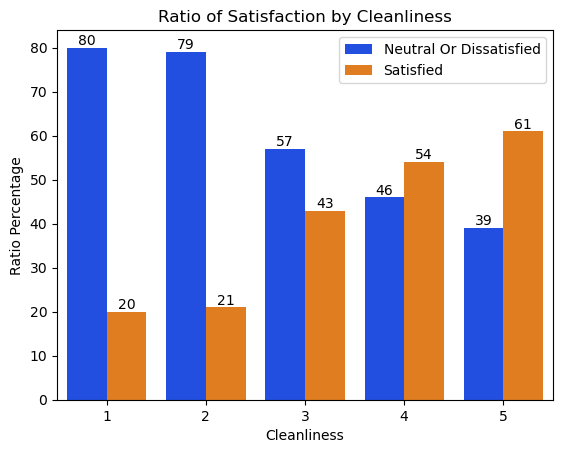

In [ ]:
ax = sns.barplot(data=df_satisfaction_by_cleanliness, x='Cleanliness', y='Ratio Percentage', hue='Satisfaction', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper right')
plt.title('Ratio of Satisfaction by Cleanliness')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Cleanliness']].reset_index().rename(columns={'Cleanliness':'Number of Customer'})

,Satisfaction,Number of Customer
0,Neutral Or Dissatisfied,58879
1,Satisfied,45025


From the table and figure above:
- Most customers are dissatisfied/neutral with the cleanliness of the aircrafts. Some major improvements are necessary. Example: increase the cleaning schedule for the area with higher traffic (toilet, aisle, tray/table, etc)

### Average Departure Delay In Minutes by Satisfaction

In [ ]:
df_avg_departure_delay = df_CPM.groupby('Satisfaction').mean()[['Departure Delay In Minutes']].reset_index().rename(columns={'Departure Delay In Minutes':'Average Departure Delay In Minutes'})
df_avg_departure_delay

,Satisfaction,Average Departure Delay In Minutes
0,Neutral Or Dissatisfied,16.50
1,Satisfied,12.61


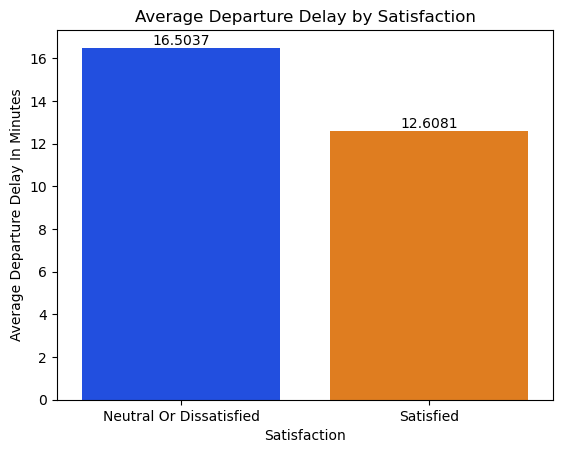

In [ ]:
# Let us create a barplot to see the average departure delay by satisfaction level
ax = sns.barplot(data=df_avg_departure_delay, x='Satisfaction', y='Average Departure Delay In Minutes', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Average Departure Delay by Satisfaction')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Departure Delay In Minutes']]

,Departure Delay In Minutes
Satisfaction,
Neutral Or Dissatisfied,58879
Satisfied,45025


From the table and figure above:
- The average departure delay duration that made customers dissatisfied/neutral is 16.50 minutes
- Majority of customers are dissatisfied/neutral with the departure delay. Some adjustments are needed. Example: reduce the departure delay by maximizing baggage loading, take off, landing, refueling, and other processes' efficiency

### Average Arrival Delay In Minutes by Satisfaction

In [ ]:
df_avg_arrival_delay = df_CPM.groupby('Satisfaction').mean()[['Arrival Delay In Minutes']].reset_index().rename(columns={'Arrival Delay In Minutes':'Average Arrival Delay In Minutes'})
df_avg_arrival_delay

,Satisfaction,Average Arrival Delay In Minutes
0,Neutral Or Dissatisfied,17.07
1,Satisfied,12.59


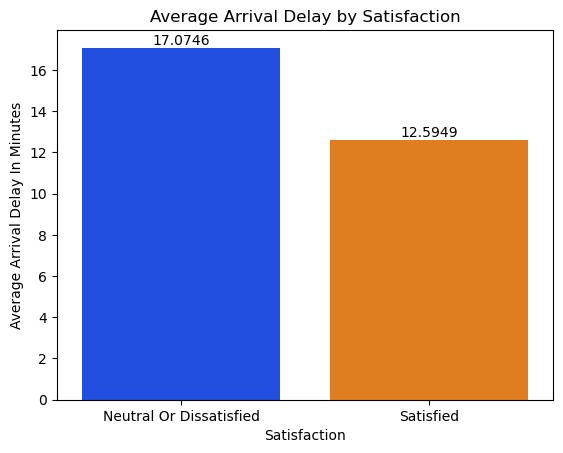

In [ ]:
# Let us create a barplot to see the average arrival delay by satisfaction level
ax = sns.barplot(data=df_avg_arrival_delay, x='Satisfaction', y='Average Arrival Delay In Minutes', palette='bright')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Average Arrival Delay by Satisfaction')
plt.show()

In [ ]:
df_CPM.groupby('Satisfaction').count()[['Arrival Delay In Minutes']]

,Arrival Delay In Minutes
Satisfaction,
Neutral Or Dissatisfied,58879
Satisfied,45025


From the table and figure above:
- The average arrival delay duration that made customers dissatisfied/neutral is 17.07 minutes
- Majority of customers are dissatisfied/neutral with the arrival delay. Some adjustments are needed. Example: reduce the arrival delay by maximizing baggage loading, take off, landing, refueling, and other processes' efficiency

# Conclusion and Recommendation 

From data analysis that we have done, we can conclude that:
- The oldest customers are 85 years old while the youngest are 7 years old.
- The highest amount of customer age is between 39-40 years old (2969 customers).
- The average age of customer is 39.38 years old
- Majority of customers are dissatisfied/neutral with the services provided, doesn't matter whether they are a loyal or disloyal customer
- Customers who travel for personal reasons have higher dissatisfaction/neutral ratio compared to customers who travel for business purposes
- The class that has the biggest difference in ratio percentage of satisfaction level is Eco Class, followed by Eco Plus Class and Business Class. More effort should be given as priority to Eco and Eco Plus Class
- For the customers who rated '1-3' on the Inflight Wifi Service, the ratio of dissatisfaction/neutral is far larger than the satisfied customers. Some adjustments need to be done to improve the Inflight Wifi Service
- All rating score in Departure/Arrival Time Convenient has higher dissatisfied/neutral customers than satisfied customers. This is an extremely critical issue and need to be reviewed immediately
- Most customers tend to be dissatisfied/neutral and rated lower for Online Booking. Some improvements need to be done
- The majority of customers are dissatisfied/neutral with the gate location. Improvements are advisable
- Most customers are dissatisfied/neutral with the food and drink provided. Some improvements are necessary. Example: expand the menu selection, improve the quality and taste of food and drink, lower the price (and at the same time, reduce the portion to maintain profit)
- The majority of customers are dissatisfied/neutral with the online boarding system. Some improvements are needed
- The majority of customers are dissatisfied/neutral with the seat and leg room provided. Some adjustments are necessary
- The majority of customers are dissatisfied/neutral with the baggage handling service. Some improvements are recommended
- Almost all rating group (1-4) are dissatisfied/neutral with the check-in service. Some immediate changes are required
- Most of the customers are dissatisfied/neutral with the inflight service provided. Immediate adjustments are necessary
- Most customers are dissatisfied/neutral with the cleanliness of the aircrafts. Some major improvements are necessary
- The average departure and arrival delay duration that made customers dissatisfied/neutral are 16.50 minutes and 17.07 minutes respectively
- Majority of customers are dissatisfied/neutral with the departure and arrival delay

**Recommendation**
1. Improve overall service provided
2. Put more effort to improve satisfaction level on Eco and Eco Plus Class. But that does not mean we can neglect the Business Class
3. Increase the onboard wifi speed, lower the wifi price or if feasible, make it free
4. Improve UI/UX for online booking, expand the payment method options, and minimize the booking steps/progress to shorten the time needed to book a flight
5. Use the closest boarding gates to the check-in/immigration counter. If not possible, provide dedicated on-ground transportation (e.g. buggy cars) to minimize the effort needed to reach the boarding gate
6. Improve the quality and taste of food and drinks, lower the price (but also reduce the portion to maintain profit)
7. Improve the UI/UX for online boarding system
8. Widen the seating area and arm rests, use softer material for the seat cushion, increase the leg room space
9. Increase the efficiency of baggage handling process by using automated machinery instead of human elements. This is also great to reduce labor cost
10. Improve the behavior and SOPs of PICs at the check-in counters, install self check-in counter at major airports
11. Improve the flight attendants' ability in giving services above and beyond the standard, create online purchase system to let customers purchase inflight services (food, drink, merchandise, entertainment, etc) before the flight
12. Increase the intensity of cleaning for areas with high traffic (toilet, aisle, table tray, etc)
13. Reduce the departure and arrival delay by maximizing baggage loading, baggage unloading, take off, landing, refueling, and other processes' efficiency

With these recommendations, we hope that this analysis will be useful for the airline company to increase customer satisfaction level.